In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = open("C:\\Users\\iseki\\OneDrive\\Desktop\\Semestri II\\Machine Learning\\Projekti\\weatherAUS.csv")

In [3]:
traindata = pd.read_csv(data)
traindata

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21/06/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22/06/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23/06/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24/06/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
traindata.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
traindata.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,21/06/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22/06/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23/06/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24/06/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,25/06/2017,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
traindata.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,06/12/2008,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,07/12/2008,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,08/12/2008,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,09/12/2008,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,10/12/2008,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [7]:
traindata.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145450,16/06/2017,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
145451,17/06/2017,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
145452,18/06/2017,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
145453,19/06/2017,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
145454,20/06/2017,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,21/06/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22/06/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23/06/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24/06/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,25/06/2017,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [8]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
traindata.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [10]:
traindata.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
traindata.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [12]:
traindata.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [13]:
traindata.describe(include = "all")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,12/11/2013,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [14]:
traindata.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [15]:
traindata.isnull().sum().sort_values(ascending = False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [16]:
traindata.shape

(145460, 23)

In [17]:
traindata=traindata.dropna()
traindata

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,01/01/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,02/01/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,04/01/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,05/01/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,06/01/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,20/06/2017,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,21/06/2017,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,22/06/2017,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,23/06/2017,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [18]:
traindata.shape

(56420, 23)

In [19]:
traindata.duplicated() 

6049      False
6050      False
6052      False
6053      False
6054      False
          ...  
142298    False
142299    False
142300    False
142301    False
142302    False
Length: 56420, dtype: bool

In [20]:
traindata = traindata.drop_duplicates() 
traindata

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,01/01/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,02/01/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,04/01/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,05/01/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,06/01/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,20/06/2017,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,21/06/2017,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,22/06/2017,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,23/06/2017,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [21]:
traindata.shape

(56420, 23)

In [22]:
traindata['MinTemp'].value_counts()

 13.0    349
 9.6     342
 8.5     333
 9.7     331
 12.5    331
        ... 
 31.4      1
-5.3       1
-3.8       1
-5.8       1
-6.7       1
Name: MinTemp, Length: 348, dtype: int64

In [23]:
traindata['MaxTemp'].value_counts()

19.6    303
18.2    300
19.4    300
20.1    298
23.5    294
       ... 
45.4      1
47.3      1
45.8      1
6.3       1
7.5       1
Name: MaxTemp, Length: 395, dtype: int64

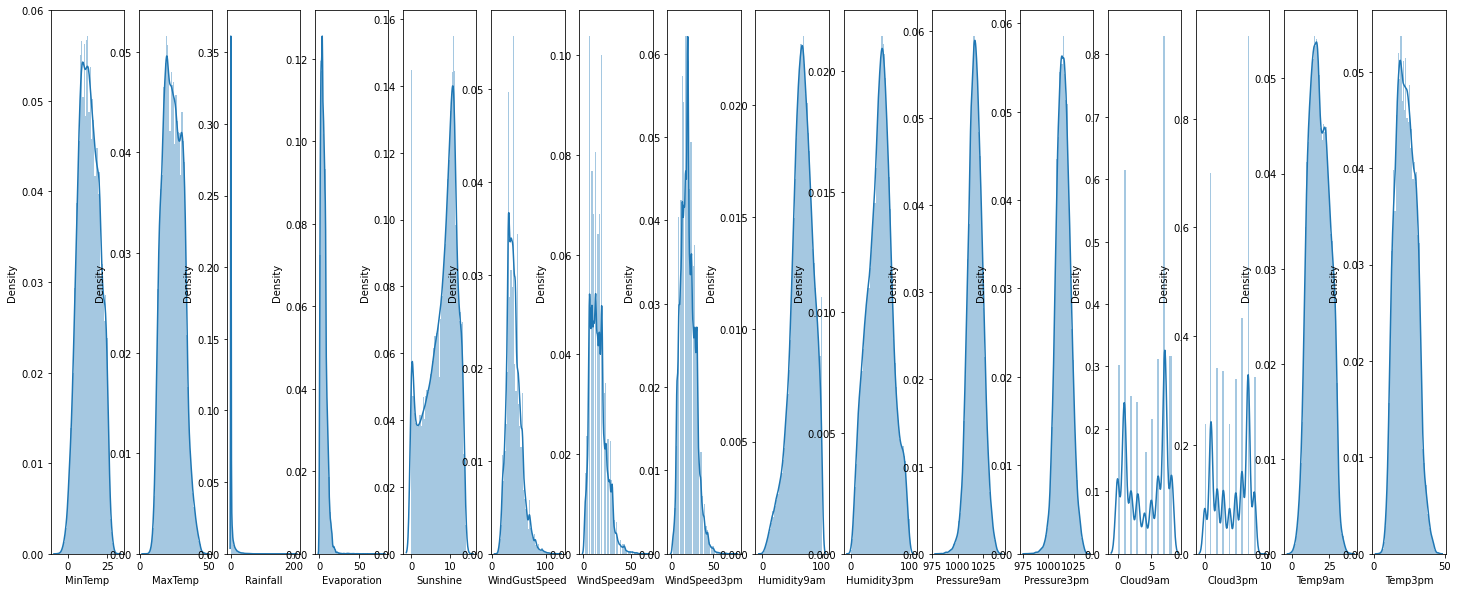

In [24]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(25,10))
plt.subplot(1,16,1)
sns.distplot(traindata['MinTemp'])
plt.subplot(1,16,2)
sns.distplot(traindata['MaxTemp'])
plt.subplot(1,16,3)
sns.distplot(traindata['Rainfall'])
plt.subplot(1,16,4)
sns.distplot(traindata['Evaporation'])
plt.subplot(1,16,5)
sns.distplot(traindata['Sunshine'])
plt.subplot(1,16,6)
sns.distplot(traindata['WindGustSpeed'])
plt.subplot(1,16,7)
sns.distplot(traindata['WindSpeed9am'])
plt.subplot(1,16,8)
sns.distplot(traindata['WindSpeed3pm'])
plt.subplot(1,16,9)
sns.distplot(traindata['Humidity9am'])
plt.subplot(1,16,10)
sns.distplot(traindata['Humidity3pm'])
plt.subplot(1,16,11)
sns.distplot(traindata['Pressure9am'])
plt.subplot(1,16,12)
sns.distplot(traindata['Pressure3pm'])
plt.subplot(1,16,13)
sns.distplot(traindata['Cloud9am'])
plt.subplot(1,16,14)
sns.distplot(traindata['Cloud3pm'])
plt.subplot(1,16,15)
sns.distplot(traindata['Temp9am'])
plt.subplot(1,16,16)
sns.distplot(traindata['Temp3pm'])
plt.show()

In [25]:
print("Highest allowed",traindata['MinTemp'].mean() + 3*traindata['MinTemp'].std())
print("Lowest allowed",traindata['MinTemp'].mean() - 3*traindata['MinTemp'].std())

Highest allowed 32.7148359508453
Lowest allowed -5.785296780338667


In [26]:
traindata[(traindata['MinTemp'] > 32.71) | (traindata['MinTemp'] < -5.78)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
46924,30/07/2011,Canberra,-6.7,15.7,0.0,1.4,6.9,NW,37.0,N,...,86.0,31.0,1026.3,1022.0,4.0,1.0,0.5,15.1,No,No
47263,03/07/2012,Canberra,-5.8,12.0,0.0,1.4,7.6,SW,30.0,NNE,...,97.0,39.0,1023.0,1019.9,1.0,1.0,-0.5,11.6,No,No


In [27]:
traindata = traindata[(traindata['MinTemp'] < 32.71) & (traindata['MinTemp'] > -5.78)]
traindata.shape

(56418, 23)

In [28]:
print("Highest allowed",traindata['MaxTemp'].mean() + 3*traindata['MaxTemp'].std())
print("Lowest allowed",traindata['MaxTemp'].mean() - 3*traindata['MaxTemp'].std())

Highest allowed 45.131127013441215
Lowest allowed 3.308020067277365


In [29]:
traindata[(traindata['MaxTemp'] > 45.13) | (traindata['MaxTemp'] < 3.3)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6372,20/11/2009,Cobar,28.8,45.4,0.0,17.0,8.8,N,56.0,N,...,13.0,6.0,1008.2,1004.4,1.0,6.0,37.3,43.3,No,No
13806,03/01/2014,Moree,28.3,47.3,0.0,16.0,12.0,WSW,61.0,N,...,36.0,5.0,1001.9,995.9,1.0,6.0,33.4,45.8,No,No
31928,18/01/2013,Sydney,21.7,45.8,0.0,9.0,8.4,S,78.0,E,...,62.0,14.0,1002.9,997.9,0.0,3.0,28.9,44.7,No,No
34937,18/01/2013,SydneyAirport,22.7,46.4,0.0,9.0,8.4,S,87.0,N,...,56.0,13.0,1002.7,997.5,0.0,3.0,29.3,44.9,No,Yes
36566,07/02/2009,WaggaWagga,26.0,45.2,0.0,14.0,11.5,NNW,54.0,ENE,...,32.0,12.0,1009.4,1005.9,1.0,2.0,33.1,42.7,No,No
64228,07/02/2009,MelbourneAirport,18.8,46.8,0.0,10.8,8.5,SW,83.0,N,...,21.0,10.0,1003.1,998.8,2.0,1.0,32.7,46.1,No,Yes
67421,07/02/2009,Melbourne,18.7,46.4,0.0,10.8,8.5,SW,83.0,N,...,23.0,6.0,1003.1,998.3,3.0,1.0,33.1,45.4,No,No
70430,07/02/2009,Mildura,26.1,46.7,0.0,13.2,11.7,NNW,56.0,NNE,...,11.0,10.0,1004.4,1002.9,0.0,2.0,36.4,46.1,No,No
71791,29/11/2012,Mildura,23.2,45.5,0.0,10.0,10.3,WSW,74.0,NNW,...,23.0,8.0,1006.3,1003.9,1.0,5.0,33.7,42.7,No,No
72143,14/01/2014,Mildura,24.9,45.2,0.0,12.0,12.7,SSW,50.0,NNE,...,16.0,9.0,1012.3,1009.9,1.0,3.0,35.3,43.6,No,No


In [30]:
traindata = traindata[(traindata['MaxTemp'] < 45.13) & (traindata['MaxTemp'] > 3.3)]
traindata.shape

(56401, 23)

In [31]:
print("Highest allowed",traindata['Rainfall'].mean() + 3*traindata['Rainfall'].std())
print("Lowest allowed",traindata['Rainfall'].mean() - 3*traindata['Rainfall'].std())

Highest allowed 23.178798806848235
Lowest allowed -18.91656941375259


In [32]:
traindata[(traindata['Rainfall'] > 23.17) | (traindata['Rainfall'] < -18.91)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6093,14/02/2009,Cobar,16.1,19.1,26.0,6.6,0.0,ESE,54.0,ESE,...,81.0,93.0,1014.3,1013.2,7.0,7.0,17.1,17.0,Yes,Yes
6096,17/02/2009,Cobar,15.9,20.8,32.6,3.0,0.3,ESE,44.0,ESE,...,94.0,77.0,1011.9,1010.2,8.0,7.0,16.6,20.6,Yes,Yes
6226,27/06/2009,Cobar,9.2,14.6,38.8,0.8,0.8,WNW,20.0,NNW,...,96.0,94.0,1006.7,1005.6,7.0,7.0,11.0,12.3,Yes,Yes
6348,27/10/2009,Cobar,11.7,23.7,25.6,4.0,5.9,SE,46.0,E,...,75.0,55.0,1020.4,1018.4,7.0,7.0,15.5,22.2,Yes,No
6448,04/02/2010,Cobar,19.2,29.6,36.0,4.6,2.3,N,57.0,NE,...,99.0,53.0,1006.9,1003.8,8.0,7.0,19.8,29.3,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142216,30/03/2017,Darwin,22.4,32.3,25.4,9.4,8.4,SE,39.0,W,...,84.0,65.0,1010.1,1007.5,7.0,7.0,28.2,31.7,Yes,Yes
142218,01/04/2017,Darwin,23.3,32.9,26.2,3.6,8.7,E,37.0,ESE,...,74.0,52.0,1010.2,1006.7,7.0,8.0,28.3,32.7,Yes,No
142223,06/04/2017,Darwin,23.6,33.6,24.6,6.6,8.5,E,46.0,S,...,83.0,59.0,1009.7,1006.3,7.0,3.0,26.8,31.7,Yes,Yes
142224,07/04/2017,Darwin,24.1,33.3,27.6,7.6,7.2,ENE,56.0,S,...,81.0,53.0,1010.8,1008.4,7.0,7.0,27.5,33.0,Yes,No


In [33]:
traindata = traindata[(traindata['Rainfall'] < 23.17) & (traindata['Rainfall'] > -18.91)]
traindata.shape

(55239, 23)

In [34]:
print("Highest allowed",traindata['Evaporation'].mean() + 3*traindata['Evaporation'].std())
print("Lowest allowed",traindata['Evaporation'].mean() - 3*traindata['Evaporation'].std())

Highest allowed 16.57316726469906
Lowest allowed -5.561172116343711


In [35]:
traindata[(traindata['Evaporation'] > 16.57) | (traindata['Evaporation'] < -5.56)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6064,16/01/2009,Cobar,21.6,34.2,0.0,17.4,13.1,SW,44.0,S,...,19.0,8.0,1014.1,1012.3,0.0,0.0,25.0,32.2,No,No
6087,08/02/2009,Cobar,25.1,42.0,0.0,17.4,13.0,NNE,39.0,N,...,23.0,9.0,1009.9,1007.3,0.0,1.0,31.6,40.4,No,No
6369,17/11/2009,Cobar,23.6,38.2,0.0,16.8,12.1,SW,43.0,SSE,...,16.0,9.0,1006.8,1004.6,1.0,1.0,28.8,36.8,No,No
6373,21/11/2009,Cobar,27.3,39.7,0.0,20.2,9.7,S,39.0,SSE,...,32.0,19.0,1009.6,1004.6,2.0,1.0,30.2,37.5,No,No
6406,24/12/2009,Cobar,27.3,39.6,0.0,17.2,5.1,SSW,57.0,NNE,...,36.0,25.0,1008.5,1004.5,7.0,7.0,31.3,38.7,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138595,27/01/2016,AliceSprings,20.9,39.5,0.0,24.0,8.9,WNW,33.0,SW,...,27.0,17.0,1009.1,1005.6,5.0,7.0,31.6,37.7,No,No
138602,03/02/2016,AliceSprings,20.7,29.7,0.0,25.8,6.3,SE,41.0,SE,...,61.0,38.0,1010.2,1008.5,7.0,6.0,22.5,27.7,No,No
138622,23/02/2016,AliceSprings,24.6,41.1,0.0,17.4,12.1,SE,43.0,ENE,...,16.0,12.0,1011.6,1007.2,1.0,4.0,35.3,39.6,No,No
138650,22/03/2016,AliceSprings,16.1,34.2,0.0,25.0,11.1,E,33.0,ENE,...,21.0,13.0,1014.0,1009.6,4.0,4.0,25.4,32.5,No,No


In [36]:
traindata = traindata[(traindata['Evaporation'] < 16.57) & (traindata['Evaporation'] > -5.56)]
traindata.shape

(54759, 23)

In [37]:
print("Highest allowed",traindata['Sunshine'].mean() + 3*traindata['Sunshine'].std())
print("Lowest allowed",traindata['Sunshine'].mean() - 3*traindata['Sunshine'].std())

Highest allowed 18.946474920313516
Lowest allowed -3.3560149046082053


In [38]:
traindata[(traindata['Sunshine'] > 18.94) | (traindata['Sunshine'] < -3.35)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [39]:
print("Highest allowed",traindata['WindGustSpeed'].mean() + 3*traindata['WindGustSpeed'].std())
print("Lowest allowed",traindata['WindGustSpeed'].mean() - 3*traindata['WindGustSpeed'].std())

Highest allowed 80.43133677008302
Lowest allowed 0.9087169197213925


In [40]:
traindata[(traindata['WindGustSpeed'] > 80.43) | (traindata['WindGustSpeed'] < 0.9)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6071,23/01/2009,Cobar,20.3,36.0,18.0,8.2,10.5,WSW,94.0,NNE,...,89.0,50.0,1008.6,1006.7,7.0,4.0,24.7,33.4,Yes,Yes
6313,22/09/2009,Cobar,15.1,29.6,1.0,2.2,3.1,WNW,83.0,NNE,...,65.0,43.0,1003.9,998.3,7.0,7.0,20.0,26.9,No,No
6418,05/01/2010,Cobar,22.9,34.7,0.0,10.0,7.4,SW,85.0,NNE,...,58.0,84.0,1014.3,1013.8,2.0,7.0,28.2,21.6,No,Yes
9847,01/03/2011,CoffsHarbour,21.2,32.4,4.6,4.2,8.4,SSW,98.0,N,...,79.0,67.0,1007.6,1005.0,4.0,4.0,24.3,30.5,Yes,Yes
10165,12/02/2012,CoffsHarbour,18.1,26.7,18.0,4.2,9.1,NNE,98.0,WSW,...,71.0,78.0,1014.3,1012.8,4.0,5.0,24.3,25.4,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139391,07/04/2009,Darwin,22.9,33.4,17.8,7.0,6.2,E,93.0,E,...,76.0,67.0,1011.1,1008.0,7.0,6.0,28.1,30.3,Yes,Yes
140982,12/11/2013,Darwin,22.3,34.3,14.4,6.6,10.4,NE,89.0,E,...,74.0,59.0,1008.2,1004.2,1.0,2.0,28.9,33.1,Yes,Yes
141041,10/01/2014,Darwin,22.9,32.8,22.8,12.0,3.3,SE,87.0,WNW,...,82.0,65.0,1008.1,1005.5,7.0,7.0,28.3,32.0,Yes,Yes
141065,03/02/2014,Darwin,23.8,29.8,22.4,6.4,3.4,W,81.0,WNW,...,79.0,72.0,1003.6,1001.3,7.0,7.0,28.1,29.8,Yes,Yes


In [41]:
traindata = traindata[(traindata['WindGustSpeed'] < 80.43) & (traindata['WindGustSpeed'] > 0.9)]
traindata.shape

(54162, 23)

In [42]:
print("Highest allowed",traindata['WindSpeed9am'].mean() + 3*traindata['WindSpeed9am'].std())
print("Lowest allowed",traindata['WindSpeed9am'].mean() - 3*traindata['WindSpeed9am'].std())

Highest allowed 39.49525739097162
Lowest allowed -8.678411631952383


In [43]:
traindata[(traindata['WindSpeed9am'] > 39.49) | (traindata['WindSpeed9am'] < -8.67)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
12464,02/02/2010,Moree,22.1,32.6,0.2,9.4,7.5,ENE,61.0,E,...,41.0,26.0,1009.4,1006.3,6.0,4.0,24.4,31.2,No,No
12563,12/05/2010,Moree,7.1,19.5,0.0,6.2,10.5,SSW,52.0,SSW,...,33.0,16.0,1019.0,1017.3,0.0,0.0,13.9,18.7,No,No
13777,05/12/2013,Moree,19.0,27.2,8.6,14.2,9.5,WSW,63.0,WSW,...,95.0,29.0,1003.0,1003.8,8.0,5.0,19.0,26.3,Yes,No
14510,08/12/2015,Moree,21.5,36.3,0.0,14.0,11.3,NE,56.0,NE,...,51.0,20.0,1019.1,1014.7,5.0,6.0,26.0,35.2,No,No
21202,25/03/2009,NorfolkIsland,18.9,21.9,2.4,4.8,0.0,E,63.0,ESE,...,77.0,92.0,1018.4,1017.6,8.0,8.0,21.3,20.1,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132030,29/09/2014,Hobart,10.3,18.7,1.4,8.6,11.1,NW,72.0,WNW,...,41.0,28.0,1002.7,1002.4,2.0,3.0,14.4,17.8,Yes,No
132214,01/04/2015,Hobart,11.7,25.2,0.0,1.4,0.7,NW,72.0,NNW,...,72.0,39.0,1013.1,1008.3,7.0,7.0,13.9,23.5,No,Yes
132334,30/07/2015,Hobart,9.6,14.5,0.0,2.2,3.7,N,80.0,NW,...,49.0,42.0,1010.1,999.7,7.0,7.0,10.6,13.7,No,No
132800,07/11/2016,Hobart,10.8,17.9,0.2,3.6,4.1,NNW,72.0,NNW,...,45.0,46.0,994.0,994.1,8.0,8.0,14.2,16.8,No,No


In [44]:
traindata = traindata[(traindata['WindSpeed9am'] < 39.49) & (traindata['WindSpeed9am'] > -8.67)]
traindata.shape

(53726, 23)

In [45]:
print("Highest allowed",traindata['WindSpeed3pm'].mean() + 3*traindata['WindSpeed3pm'].std())
print("Lowest allowed",traindata['WindSpeed3pm'].mean() - 3*traindata['WindSpeed3pm'].std())

Highest allowed 43.84139194543112
Lowest allowed -4.944842788598301


In [46]:
traindata[(traindata['WindSpeed3pm'] > 43.84) | (traindata['WindSpeed3pm'] < -4.94)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
9072,15/01/2009,CoffsHarbour,19.1,32.2,0.0,7.6,13.2,NNE,61.0,NNW,...,50.0,57.0,1013.9,1010.4,0.0,1.0,25.1,27.6,No,No
9333,03/10/2009,CoffsHarbour,18.2,31.1,1.4,5.8,10.3,S,63.0,SE,...,51.0,63.0,1006.7,1008.1,0.0,3.0,25.4,21.2,Yes,Yes
9387,26/11/2009,CoffsHarbour,20.5,27.6,0.0,6.2,12.9,NNE,67.0,N,...,62.0,65.0,1018.8,1014.8,2.0,3.0,25.3,26.1,No,No
9435,13/01/2010,CoffsHarbour,22.6,28.7,0.0,8.8,12.3,NE,65.0,N,...,64.0,58.0,1012.0,1009.6,0.0,1.0,26.8,28.1,No,No
9741,15/11/2010,CoffsHarbour,20.2,27.4,0.0,6.8,11.1,NNE,61.0,N,...,64.0,57.0,1015.3,1011.4,6.0,7.0,24.1,25.4,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118589,18/09/2011,PerthAirport,11.5,17.8,13.0,4.0,6.0,SW,76.0,WSW,...,87.0,42.0,1005.4,1009.8,8.0,6.0,12.6,16.0,Yes,Yes
130417,31/01/2010,Hobart,16.3,35.3,0.0,6.6,10.3,NNW,74.0,NNW,...,55.0,23.0,1009.3,1002.6,6.0,4.0,21.0,33.6,No,No
132710,09/08/2016,Hobart,5.6,16.3,0.0,1.6,5.9,N,76.0,N,...,75.0,35.0,1012.4,1003.0,6.0,7.0,9.2,16.1,No,Yes
137731,15/09/2013,AliceSprings,22.2,35.1,0.0,12.8,10.9,WNW,70.0,NW,...,25.0,10.0,1010.7,1005.5,1.0,2.0,28.1,33.9,No,No


In [47]:
traindata = traindata[(traindata['WindSpeed3pm'] < 43.84) & (traindata['WindSpeed3pm'] > -4.94)]
traindata.shape

(53500, 23)

In [48]:
print("Highest allowed",traindata['Humidity9am'].mean() + 3*traindata['Humidity9am'].std())
print("Lowest allowed",traindata['Humidity9am'].mean() - 3*traindata['Humidity9am'].std())

Highest allowed 120.36847996062264
Lowest allowed 11.424492001994196


In [49]:
traindata[(traindata['Humidity9am'] > 120.36) | (traindata['Humidity9am'] < 11.42)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6322,01/10/2009,Cobar,14.7,34.9,0.0,10.0,11.4,NNW,43.0,NNE,...,9.0,1.0,1013.3,1007.9,0.0,0.0,25.0,33.8,No,No
6387,05/12/2009,Cobar,15.5,32.7,0.0,14.6,12.4,WSW,35.0,SE,...,6.0,4.0,1015.5,1013.1,1.0,1.0,24.6,30.7,No,No
6390,08/12/2009,Cobar,22.8,39.9,0.0,14.0,8.2,SW,74.0,NE,...,10.0,5.0,1006.6,1002.6,1.0,7.0,31.5,38.2,No,No
6438,25/01/2010,Cobar,22.1,41.2,0.0,14.4,12.6,S,33.0,SSE,...,9.0,8.0,1010.0,1007.3,1.0,6.0,29.5,40.2,No,No
6439,26/01/2010,Cobar,24.2,41.3,0.0,14.6,12.0,SSW,33.0,ESE,...,11.0,6.0,1009.8,1006.7,1.0,1.0,31.5,40.4,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138535,28/11/2015,AliceSprings,23.1,38.1,0.0,15.6,9.1,E,41.0,ENE,...,11.0,7.0,1013.9,1009.3,5.0,5.0,28.8,36.9,No,No
138541,04/12/2015,AliceSprings,18.3,39.2,0.0,13.4,12.5,NE,31.0,NE,...,8.0,11.0,1014.5,1009.1,7.0,7.0,30.5,37.6,No,No
138542,05/12/2015,AliceSprings,20.2,41.2,0.0,10.8,10.6,N,43.0,NE,...,9.0,11.0,1012.1,1007.0,1.0,5.0,35.7,40.0,No,No
138613,14/02/2016,AliceSprings,18.8,40.8,0.0,14.6,12.8,SSW,43.0,N,...,11.0,5.0,1009.8,1006.7,0.0,0.0,33.6,39.7,No,No


In [50]:
traindata = traindata[(traindata['Humidity9am'] < 120.36) & (traindata['Humidity9am'] > 11.42)]
traindata.shape

(53260, 23)

In [51]:
print("Highest allowed",traindata['Humidity3pm'].mean() + 3*traindata['Humidity3pm'].std())
print("Lowest allowed",traindata['Humidity3pm'].mean() - 3*traindata['Humidity3pm'].std())

Highest allowed 108.55565400775814
Lowest allowed -9.383967939414163


In [52]:
traindata[(traindata['Humidity3pm'] > 108.55) | (traindata['Humidity3pm'] < -9.38)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [53]:
print("Highest allowed",traindata['Pressure9am'].mean() + 3*traindata['Pressure9am'].std())
print("Lowest allowed",traindata['Pressure9am'].mean() - 3*traindata['Pressure9am'].std())

Highest allowed 1037.7936992801406
Lowest allowed 997.4090044374674


In [54]:
traindata[(traindata['Pressure9am'] > 1037.79) | (traindata['Pressure9am'] < 997.4)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
22180,28/12/2011,NorfolkIsland,20.8,23.5,13.6,0.4,0.2,NW,56.0,N,...,95.0,88.0,994.9,997.1,8.0,7.0,21.7,23.1,Yes,Yes
23294,15/03/2015,NorfolkIsland,19.6,23.8,7.6,4.0,2.8,ESE,52.0,S,...,95.0,95.0,994.6,995.2,8.0,7.0,20.1,21.7,Yes,Yes
32370,03/05/2014,Sydney,11.7,15.7,1.2,5.6,1.1,W,57.0,NW,...,81.0,46.0,996.5,994.8,7.0,7.0,12.7,14.8,Yes,Yes
32893,08/10/2015,Sydney,17.0,21.1,0.0,6.6,2.2,ENE,35.0,ESE,...,53.0,57.0,1038.8,1036.0,7.0,7.0,18.5,19.9,No,No
33142,13/06/2016,Sydney,8.5,20.3,0.0,1.0,6.5,W,30.0,W,...,65.0,51.0,1039.0,1035.5,5.0,1.0,10.3,17.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132766,04/10/2016,Hobart,8.8,15.8,1.0,5.0,7.2,NW,67.0,N,...,48.0,51.0,984.6,987.1,3.0,7.0,12.3,12.9,No,Yes
132772,10/10/2016,Hobart,7.3,13.1,9.4,4.8,9.0,WNW,80.0,NW,...,79.0,45.0,993.6,994.2,7.0,4.0,7.7,12.7,Yes,Yes
132798,05/11/2016,Hobart,7.2,14.7,7.8,7.4,6.1,WSW,76.0,ENE,...,50.0,52.0,994.0,996.1,6.0,6.0,11.6,12.0,Yes,No
132853,30/12/2016,Hobart,16.6,25.5,20.8,1.8,7.1,SE,41.0,S,...,81.0,72.0,997.2,993.4,7.0,6.0,20.0,22.9,Yes,No


In [55]:
traindata = traindata[(traindata['Pressure9am'] < 1037.79) & (traindata['Pressure9am'] > 997.4)]
traindata.shape

(53065, 23)

In [56]:
print("Highest allowed",traindata['Pressure3pm'].mean() + 3*traindata['Pressure3pm'].std())
print("Lowest allowed",traindata['Pressure3pm'].mean() - 3*traindata['Pressure3pm'].std())

Highest allowed 1034.9884862392564
Lowest allowed 995.363885380433


In [57]:
traindata[(traindata['Pressure3pm'] > 1034.98) | (traindata['Pressure3pm'] < 995.36)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
33250,29/09/2016,Sydney,14.2,22.8,1.4,5.4,4.2,NW,56.0,NNE,...,76.0,50.0,1000.5,994.0,8.0,2.0,14.8,22.3,Yes,No
33363,20/01/2017,Sydney,19.0,29.2,0.0,5.8,2.6,SSW,65.0,NNE,...,62.0,68.0,1001.1,994.3,7.0,7.0,24.1,28.3,No,Yes
33955,12/03/2010,SydneyAirport,18.6,24.4,0.0,9.0,7.9,SSE,44.0,SSE,...,62.0,47.0,1035.5,1035.2,3.0,5.0,21.0,22.9,No,No
34172,15/10/2010,SydneyAirport,19.3,25.2,0.0,7.8,0.2,N,72.0,NNE,...,65.0,66.0,999.6,989.3,8.0,7.0,22.2,23.0,No,Yes
34237,19/12/2010,SydneyAirport,17.3,28.3,0.0,5.0,5.0,N,69.0,NW,...,65.0,36.0,1003.7,995.0,6.0,4.0,20.7,26.5,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132695,25/07/2016,Hobart,2.8,12.1,0.0,1.0,5.8,NW,69.0,NNW,...,84.0,56.0,998.4,994.2,5.0,6.0,3.8,11.4,No,Yes
132761,29/09/2016,Hobart,8.2,15.2,0.4,2.8,0.0,ENE,54.0,NNE,...,81.0,77.0,997.8,994.1,8.0,8.0,13.7,14.2,No,Yes
132897,12/02/2017,Hobart,11.9,18.6,0.0,6.8,8.6,W,76.0,NNW,...,41.0,32.0,997.5,994.3,4.0,6.0,14.3,16.9,No,Yes
136867,05/02/2011,AliceSprings,22.4,27.8,7.4,7.4,1.1,N,59.0,SW,...,96.0,91.0,997.7,995.0,7.0,7.0,23.3,24.9,Yes,Yes


In [58]:
traindata = traindata[(traindata['Pressure3pm'] < 1034.98) & (traindata['Pressure3pm'] > 995.36)]
traindata.shape

(52989, 23)

In [59]:
print("Highest allowed",traindata['Cloud9am'].mean() + 3*traindata['Cloud9am'].std())
print("Lowest allowed",traindata['Cloud9am'].mean() - 3*traindata['Cloud9am'].std())

Highest allowed 12.558758722601292
Lowest allowed -4.175094188452695


In [60]:
traindata[(traindata['Cloud9am'] > 12.55) | (traindata['Cloud9am'] < -4.17)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [61]:
print("Highest allowed",traindata['Cloud3pm'].mean() + 3*traindata['Cloud3pm'].std())
print("Lowest allowed",traindata['Cloud3pm'].mean() - 3*traindata['Cloud3pm'].std())

Highest allowed 12.198906814363935
Lowest allowed -3.660228975567204


In [62]:
traindata[(traindata['Cloud3pm'] > 12.19) | (traindata['Cloud3pm'] < -3.66)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [63]:
print("Highest allowed",traindata['Temp9am'].mean() + 3*traindata['Temp9am'].std())
print("Lowest allowed",traindata['Temp9am'].mean() - 3*traindata['Temp9am'].std())

Highest allowed 37.63189276881131
Lowest allowed -1.4569734459329666


In [64]:
traindata[(traindata['Temp9am'] > 37.63) | (traindata['Temp9am'] < -1.45)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
119377,12/01/2014,PerthAirport,28.5,43.0,0.0,16.0,12.2,E,61.0,N,...,12.0,26.0,1007.6,1007.7,1.0,1.0,39.4,34.7,No,No
122570,12/01/2014,Perth,29.7,41.0,0.0,16.0,12.2,NW,37.0,N,...,13.0,33.0,1007.4,1008.0,1.0,1.0,39.0,33.1,No,No
137506,05/01/2013,AliceSprings,22.2,42.7,0.0,13.4,8.2,NE,67.0,N,...,15.0,15.0,1005.6,1004.1,1.0,7.0,37.7,38.8,No,No


In [65]:
traindata = traindata[(traindata['Temp9am'] < 37.63) & (traindata['Temp9am'] > -1.45)]
traindata.shape

(52986, 23)

In [66]:
print("Highest allowed",traindata['Temp3pm'].mean() + 3*traindata['Temp3pm'].std())
print("Lowest allowed",traindata['Temp3pm'].mean() - 3*traindata['Temp3pm'].std())

Highest allowed 42.75523581328473
Lowest allowed 2.5456549880587893


In [67]:
traindata[(traindata['Temp3pm'] > 42.75) | (traindata['Temp3pm'] < 2.54)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6084,05/02/2009,Cobar,27.2,43.4,0.0,14.2,12.6,NNW,37.0,N,...,33.0,14.0,1005.9,1003.3,1.0,3.0,32.6,43.0,No,No
6371,19/11/2009,Cobar,27.4,43.9,0.0,13.8,8.5,WSW,44.0,NNW,...,16.0,6.0,1009.6,1006.0,7.0,5.0,31.1,43.4,No,No
61211,30/01/2009,Sale,18.9,43.4,0.0,12.6,12.7,SE,48.0,WNW,...,45.0,10.0,1011.8,1008.5,0.0,1.0,28.6,42.9,No,No
62585,04/01/2013,Sale,15.4,44.3,0.0,7.2,12.8,E,48.0,WNW,...,48.0,12.0,1009.8,1005.1,3.0,2.0,25.9,44.1,No,No
70767,10/01/2010,Mildura,21.7,44.2,0.0,12.6,12.5,NW,31.0,NNE,...,27.0,11.0,1014.4,1011.6,0.0,2.0,30.5,43.3,No,No
71796,04/01/2013,Mildura,23.8,44.2,0.0,12.0,13.4,N,37.0,NNE,...,19.0,7.0,1007.3,1004.1,0.0,0.0,32.5,43.0,No,No
71809,17/01/2013,Mildura,20.4,45.0,0.0,12.0,12.8,NW,48.0,NNE,...,15.0,9.0,1007.0,1002.8,1.0,1.0,31.2,42.9,No,No
72144,15/01/2014,Mildura,24.0,44.1,0.0,16.4,13.0,N,33.0,N,...,17.0,10.0,1014.3,1011.9,1.0,2.0,35.2,43.0,No,No
79741,16/01/2014,Watsonia,24.9,43.9,0.2,13.0,9.1,NNW,35.0,ENE,...,41.0,11.0,1015.3,1011.4,2.0,4.0,30.2,42.9,No,No
101313,02/02/2014,MountGambier,16.5,44.9,0.0,10.2,10.2,WSW,57.0,NE,...,19.0,6.0,1008.3,1004.7,2.0,6.0,30.0,44.1,No,No


In [68]:
traindata = traindata[(traindata['Temp3pm'] < 42.75) & (traindata['Temp3pm'] > 2.54)]
traindata.shape

(52974, 23)

In [69]:
vlera = traindata.sort_values(['MaxTemp'], ascending=False)
vlera.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
105589,28/01/2009,Woomera,28.9,44.6,0.0,16.0,12.4,NNE,54.0,N,...,23.0,16.0,1007.8,1005.6,1.0,1.0,35.6,42.6,No,No
73267,11/02/2017,Mildura,28.6,44.4,0.0,13.0,12.4,S,44.0,SSW,...,49.0,21.0,1008.0,1004.6,3.0,1.0,31.0,42.5,No,No
122928,05/01/2015,Perth,23.2,44.4,0.0,10.6,11.3,NE,37.0,NE,...,30.0,23.0,1008.5,1005.5,0.0,2.0,33.9,39.5,No,No
71799,07/01/2013,Mildura,20.7,44.2,0.0,15.2,13.4,WSW,35.0,SE,...,40.0,12.0,1016.3,1011.0,0.0,0.0,25.7,41.5,No,No
119735,05/01/2015,PerthAirport,21.5,44.2,0.0,10.6,11.3,E,57.0,ENE,...,24.0,20.0,1008.6,1005.1,0.0,2.0,34.3,41.0,No,No
101296,16/01/2014,MountGambier,22.8,44.1,0.0,9.0,12.1,NW,48.0,N,...,30.0,12.0,1012.9,1009.6,1.0,5.0,32.2,42.5,No,No
70423,31/01/2009,Mildura,26.7,44.1,0.0,14.4,9.8,NNE,33.0,N,...,20.0,9.0,1011.8,1009.2,6.0,5.0,32.6,42.4,No,No
72540,15/02/2015,Mildura,22.3,44.1,0.0,11.6,8.0,SSW,54.0,NNE,...,43.0,12.0,1013.1,1009.7,2.0,5.0,27.9,42.3,No,No
72146,17/01/2014,Mildura,25.5,44.1,0.0,16.0,13.0,NNE,41.0,NNE,...,19.0,8.0,1009.8,1006.0,1.0,4.0,33.9,42.6,No,No
72162,02/02/2014,Mildura,24.6,44.1,0.0,9.2,10.8,N,30.0,ENE,...,28.0,9.0,1008.5,1005.9,1.0,5.0,30.9,42.3,No,No


In [70]:
numri= traindata.query('(Sunshine > 10)')
numri.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,01/01/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,02/01/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,04/01/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,05/01/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6056,08/01/2009,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,No


In [71]:
vlera = traindata.sort_values(['Temp9am'], ascending=False)
vlera.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
36370,18/01/2017,SydneyAirport,26.1,37.7,0.0,13.8,11.1,S,61.0,WNW,...,28.0,74.0,1005.4,1006.7,1.0,2.0,37.2,25.1,No,No
70768,11/01/2010,Mildura,28.3,43.6,0.0,14.6,12.3,N,54.0,NW,...,14.0,12.0,1010.9,1007.4,4.0,3.0,36.9,42.3,No,No
118386,28/01/2011,PerthAirport,26.9,40.4,0.0,8.2,12.5,WNW,57.0,N,...,32.0,40.0,1006.3,1006.3,5.0,6.0,36.8,35.2,No,No
33361,18/01/2017,Sydney,25.1,38.1,0.0,13.8,11.1,SSE,59.0,WNW,...,26.0,52.0,1005.4,1006.8,1.0,2.0,36.5,30.1,No,No
121579,28/01/2011,Perth,26.1,38.1,0.0,8.2,12.5,NW,50.0,N,...,34.0,43.0,1006.1,1006.0,5.0,6.0,36.4,34.3,No,No
61558,12/01/2010,Sale,19.9,37.9,0.0,8.8,4.7,W,69.0,NNW,...,22.0,48.0,1002.8,1001.9,8.0,7.0,36.4,31.0,No,Yes
137809,02/12/2013,AliceSprings,28.0,39.5,0.0,14.6,5.6,E,44.0,NW,...,27.0,66.0,1010.1,1008.4,2.0,8.0,36.3,27.0,No,Yes
137514,13/01/2013,AliceSprings,24.9,44.0,2.2,16.2,7.8,N,67.0,W,...,31.0,17.0,1007.5,1003.7,3.0,5.0,35.8,42.6,Yes,No
137167,01/01/2012,AliceSprings,24.2,42.4,0.0,13.4,10.8,NE,41.0,NNE,...,21.0,9.0,1007.2,1002.6,1.0,6.0,35.7,40.9,No,No
6085,06/02/2009,Cobar,29.1,43.5,0.0,13.0,12.1,WNW,28.0,NNW,...,25.0,16.0,1007.5,1005.2,1.0,2.0,35.6,41.4,No,No


In [72]:
vlera = traindata.sort_values(['MinTemp'], ascending=True)
vlera.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45879,19/08/2008,Canberra,-5.3,13.1,0.0,2.2,7.9,NW,33.0,N,...,94.0,47.0,1029.6,1025.6,6.0,6.0,0.1,12.2,No,No
46966,10/09/2011,Canberra,-5.2,14.0,0.4,2.6,8.5,WSW,63.0,NW,...,60.0,36.0,1011.9,1010.6,1.0,4.0,7.1,12.3,No,No
137355,07/07/2012,AliceSprings,-5.2,19.4,0.0,4.4,10.2,ENE,33.0,W,...,17.0,16.0,1022.5,1017.4,0.0,0.0,6.0,19.0,No,No
137351,03/07/2012,AliceSprings,-4.9,15.1,0.0,4.0,10.1,ESE,48.0,ESE,...,20.0,25.0,1027.0,1024.0,0.0,0.0,5.7,14.4,No,No
46902,08/07/2011,Canberra,-4.7,9.3,0.0,3.0,5.9,NNW,44.0,N,...,99.0,53.0,1024.7,1021.1,8.0,1.0,-0.2,8.3,No,No
47213,14/05/2012,Canberra,-4.7,14.0,0.0,2.0,9.7,S,37.0,SSW,...,69.0,37.0,1023.2,1022.6,1.0,1.0,5.7,13.0,No,No
37417,08/07/2011,WaggaWagga,-4.7,8.3,0.0,1.2,2.4,SW,30.0,ESE,...,76.0,64.0,1026.7,1025.4,4.0,8.0,1.2,7.9,No,Yes
137354,06/07/2012,AliceSprings,-4.4,16.4,0.0,3.4,10.2,E,41.0,E,...,26.0,19.0,1026.7,1021.6,1.0,0.0,5.1,15.5,No,No
137352,04/07/2012,AliceSprings,-4.3,16.5,0.0,3.2,9.9,ESE,44.0,E,...,36.0,23.0,1028.2,1025.3,0.0,0.0,5.8,15.2,No,No
137353,05/07/2012,AliceSprings,-4.0,16.2,0.0,4.4,10.2,ESE,54.0,ESE,...,29.0,27.0,1028.9,1025.3,0.0,0.0,6.4,15.5,No,No


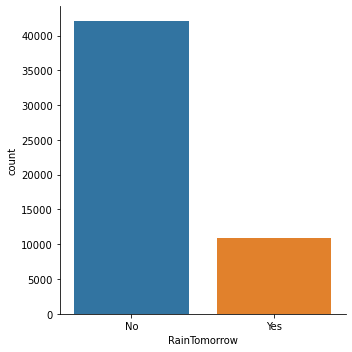

In [73]:
sns.catplot(x = 'RainTomorrow', kind = 'count', data = traindata)

In [74]:
traindata['RainTomorrow'].value_counts()

No     42079
Yes    10895
Name: RainTomorrow, dtype: int64

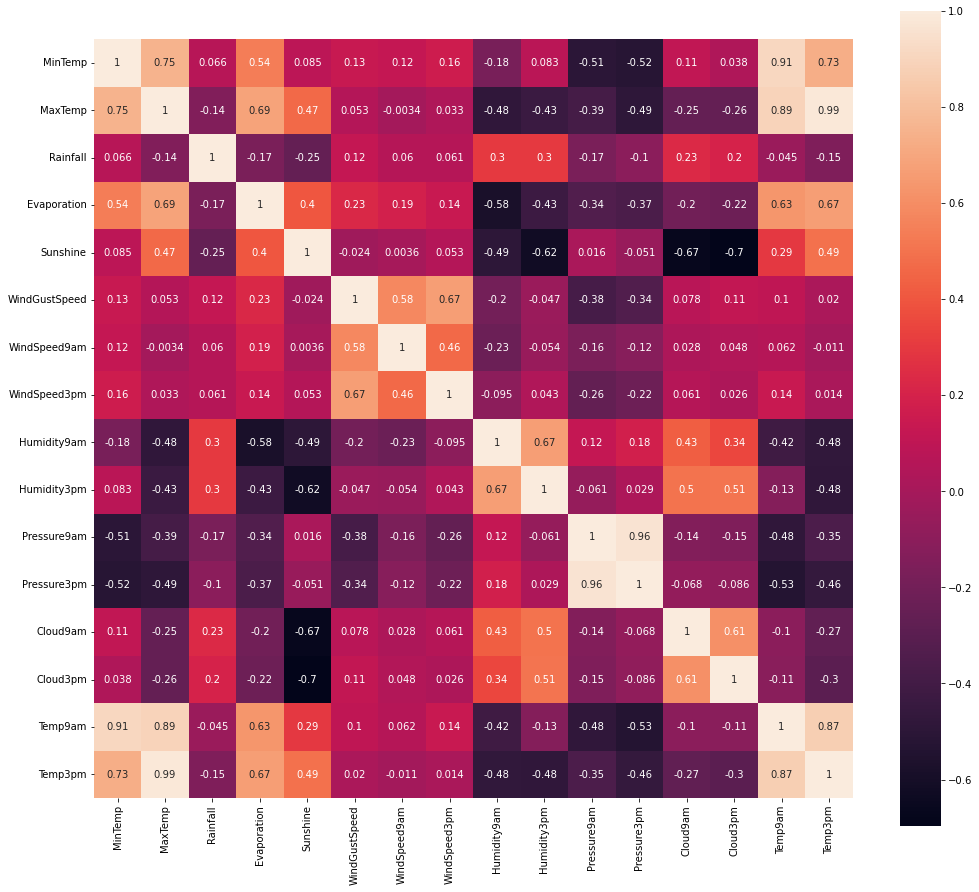

In [75]:
plt.figure(figsize=(17,15))
correlacao = sns.heatmap(traindata.corr(), square=True, annot=True)
correlacao.set_xticklabels(correlacao.get_xticklabels(), rotation=90)          
plt.show()

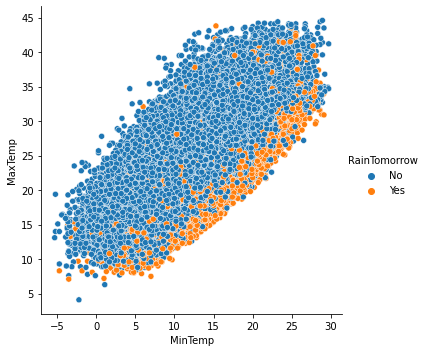

In [76]:
sns.relplot(x='MinTemp', y = 'MaxTemp', hue = "RainTomorrow", data = traindata)

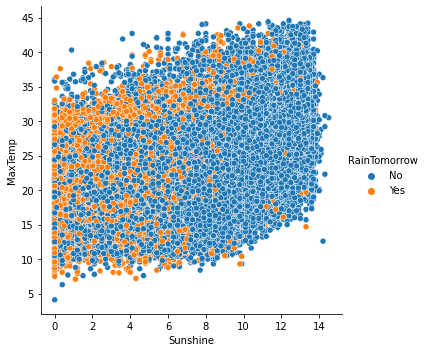

In [77]:
sns.relplot(x='Sunshine', y = 'MaxTemp', hue = "RainTomorrow", data = traindata)

In [ ]:
# Ndertimi i modelit

In [78]:
# largojme kolonen date pasi qe nuk ndikon asgje ne parashikim
traindata = traindata.drop('Date', 1)
traindata

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [79]:
X = traindata.iloc[:, 0:21].values

In [80]:
y = traindata.iloc[:, -1].values

In [81]:
numeric_col=traindata.select_dtypes(include="float64").columns
numeric_col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [82]:
cat_col=traindata.select_dtypes(include="object").columns
cat_col

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [83]:
# Permes LabelEncoder i transformojme variablat kategorike ne kontinuale
from sklearn.preprocessing import LabelEncoder

In [84]:
label_encoder_Location = LabelEncoder()
label_encoder_WindGustDir = LabelEncoder()
label_encoder_WindGustSpeed = LabelEncoder()
label_encoder_WindDir9am = LabelEncoder()
label_encoder_WindDir3pm = LabelEncoder()
label_encoder_RainToday = LabelEncoder()

In [85]:
X[:,0] = label_encoder_Location.fit_transform(X[:,0])
X[:,6] = label_encoder_WindGustDir.fit_transform(X[:,6])
X[:,7] = label_encoder_WindGustSpeed.fit_transform(X[:,7])
X[:,8] = label_encoder_WindDir9am.fit_transform(X[:,8])
X[:,9] = label_encoder_WindDir3pm.fit_transform(X[:,9])
X[:,20] = label_encoder_RainToday.fit_transform(X[:,20])

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [87]:
X_standard[0]

array([-1.19274098,  0.71358993,  1.61969874, -0.38700948,  2.07498627,
        1.20637816,  0.74115246,  0.71559085, -1.31110788,  0.94587645,
       -1.20323842,  0.0861625 , -2.5959107 , -1.86002989, -1.73188549,
       -1.64387052, -0.78621046,  0.27628696,  1.308155  ,  1.60627419,
       -0.50380798])

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
obj_norm = MinMaxScaler().fit(X)

In [90]:
X_normalization = obj_norm.transform(X)

In [91]:
X_normalization[0]

array([0.16      , 0.66285714, 0.76790123, 0.        , 0.73170732,
       0.84827586, 0.73333333, 0.55263158, 0.06666667, 0.8       ,
       0.10810811, 0.43902439, 0.09090909, 0.12121212, 0.21890547,
       0.2278481 , 0.25      , 0.55555556, 0.72031662, 0.76349614,
       0.        ])

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X_normalization, y, test_size = 0.3, random_state = 0)

In [94]:
x_train.shape, y_train.shape

((37081, 21), (37081,))

In [95]:
x_test.shape, y_test.shape

((15893, 21), (15893,))

In [ ]:
# Naive Bayes

In [96]:
# Gaussian Model
from sklearn.naive_bayes import GaussianNB

In [97]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [98]:
predictions = naive_bayes.predict(x_test)
predictions

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype='<U3')

In [99]:
confusion = confusion_matrix(y_test, predictions)

In [100]:
NB_saktesia = accuracy_score(y_test, predictions)
NB_saktesia = round(NB_saktesia*100, 2)
print(f'Saktesia: {NB_saktesia} %')

Saktesia: 79.03 %


In [101]:
from sklearn.utils.metaestimators import available_if
from yellowbrick.classifier import ConfusionMatrix

0.790347951928522

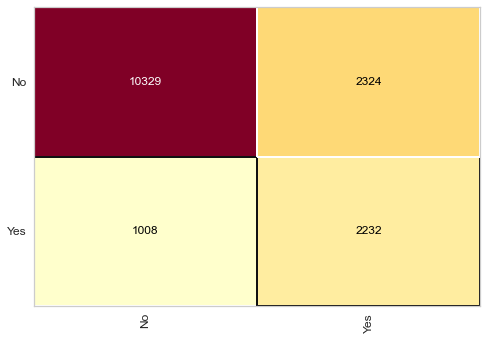

In [102]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [103]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.91      0.82      0.86     12653
         Yes       0.49      0.69      0.57      3240

    accuracy                           0.79     15893
   macro avg       0.70      0.75      0.72     15893
weighted avg       0.83      0.79      0.80     15893



In [104]:
# Bernoulli  Model
from sklearn.naive_bayes import BernoulliNB

In [105]:
naive_bayes = BernoulliNB()
naive_bayes.fit(x_train, y_train)

BernoulliNB()

In [106]:
predictions = naive_bayes.predict(x_test)
predictions

array(['Yes', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype='<U3')

In [107]:
NBbernoulli_saktesia = accuracy_score(y_test, predictions)
NBbernoulli_saktesia = round(NBbernoulli_saktesia*100, 2)
print(f'Saktesia: {NBbernoulli_saktesia} %')

Saktesia: 77.52 %


0.775246964072233

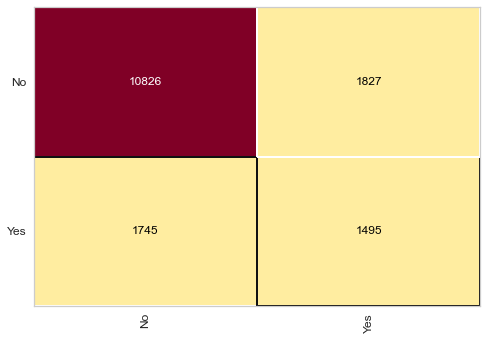

In [108]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [109]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.86      0.86      0.86     12653
         Yes       0.45      0.46      0.46      3240

    accuracy                           0.78     15893
   macro avg       0.66      0.66      0.66     15893
weighted avg       0.78      0.78      0.78     15893



In [ ]:
# Decision Tree

In [110]:
# Entropy Calculation
arvore_entropy = DecisionTreeClassifier(criterion = 'entropy')

In [111]:
arvore_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [112]:
predictions = arvore_entropy.predict(x_test)
predictions

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [113]:
DTE_saktesia = accuracy_score(y_test, predictions)
DTE_saktesia = round(DTE_saktesia*100, 2)
print(f'Saktesia: {DTE_saktesia} %')

Saktesia: 80.2 %


0.8019882967344114

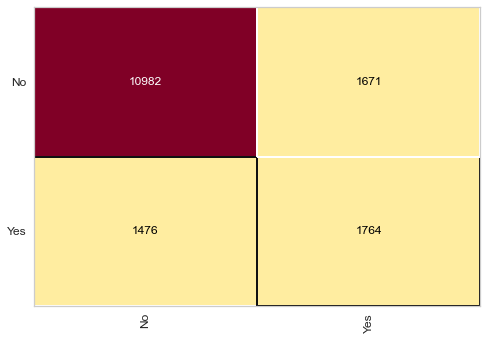

In [114]:
cm = ConfusionMatrix(arvore_entropy)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [115]:
# Gini Calculation
arvore_gini = DecisionTreeClassifier()

In [116]:
arvore_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [117]:
predictions = arvore_gini.predict(x_test)
predictions

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [118]:
DTG_saktesia = accuracy_score(y_test, predictions)
DTG_saktesia = round(DTG_saktesia*100, 2)
print(f'Saktesia: {DTG_saktesia} %')

Saktesia: 79.59 %


0.7958849808091613

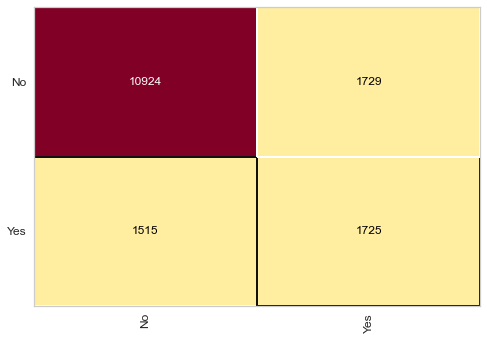

In [119]:
cm = ConfusionMatrix(arvore_gini)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
# K Nearest Neighbours

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier(n_neighbors = 27, metric = 'minkowski', p = 2)

In [122]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [123]:
predictions = knn.predict(x_test)
predictions

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [125]:
KNN_saktesia = accuracy_score(y_test, predictions)
KNN_saktesia = round(KNN_saktesia*100, 2)
print(f'Saktesia: {KNN_saktesia} %')

Saktesia: 85.03 %


0.850311457874536

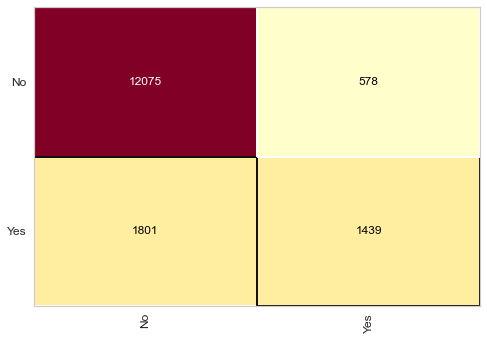

In [126]:
cm = ConfusionMatrix(knn)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
# Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
logistic = LogisticRegression(random_state = 1, solver='lbfgs', max_iter=1000)

In [129]:
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [130]:
predictions = logistic.predict(x_test)
predictions

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [131]:
LR_saktesia = accuracy_score(y_test, predictions)
LR_saktesia = round(LR_saktesia*100, 2)
print(f'Saktesia: {LR_saktesia} %')

Saktesia: 85.67 %


0.8567293777134588

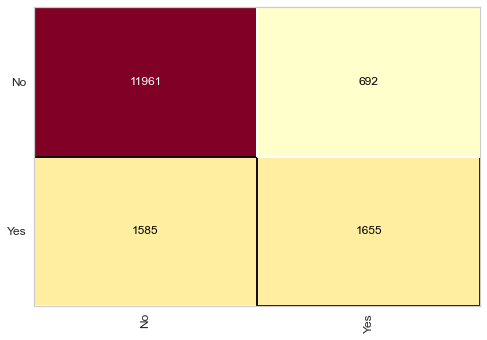

In [132]:
cm = ConfusionMatrix(logistic)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)